In [8]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
n_task_per_file = 50
n_files = 10
base_dir = "prop/vary_signa_G_nomarg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [10]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [11]:
#oper_char_df = oper_char_df[oper_char_df['Method'] != "UV(0.1)"]

In [12]:
oper_char_df.groupby(['SD(Y)', "Method"]).mean()

Coverage Rate      Length         MSE
SD(Y) Method                                            
1.0   RRT               0.621978    5.274621    1.347817
      Tree-Values       0.922619   23.660798    1.133990
      UV(0.1)           0.913797   10.910725    1.321848
2.0   RRT               0.736996   11.491712    4.694735
      Tree-Values       0.916972   65.528527    4.766596
      UV(0.1)           0.913797   21.821449    4.776584
5.0   RRT               0.910623   49.311050   28.746566
      Tree-Values       0.889499         inf   30.048595
      UV(0.1)           0.925641   54.553623   29.585807
10.0  RRT               0.924969  168.342872  114.426630
      Tree-Values       0.920177  777.389097  120.694654
      UV(0.1)           0.847192  109.107246  116.112647

In [13]:
oper_char_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,0.571429,4.663940,1.162283,RRT,1.0
1,1.000000,5.287472,1.107326,Tree-Values,1.0
2,0.833333,10.910725,1.539952,UV(0.1),1.0
3,0.857143,11.409241,4.396477,RRT,2.0
4,1.000000,13.864856,4.470479,Tree-Values,2.0
...,...,...,...,...,...
43,0.428571,15033.619510,24.696274,Tree-Values,5.0
44,1.000000,54.553623,25.852363,UV(0.1),5.0
45,0.800000,153.498207,113.702997,RRT,10.0
46,1.000000,386.023036,111.489712,Tree-Values,10.0


In [14]:
oper_char_df.index = range(oper_char_df.shape[0])

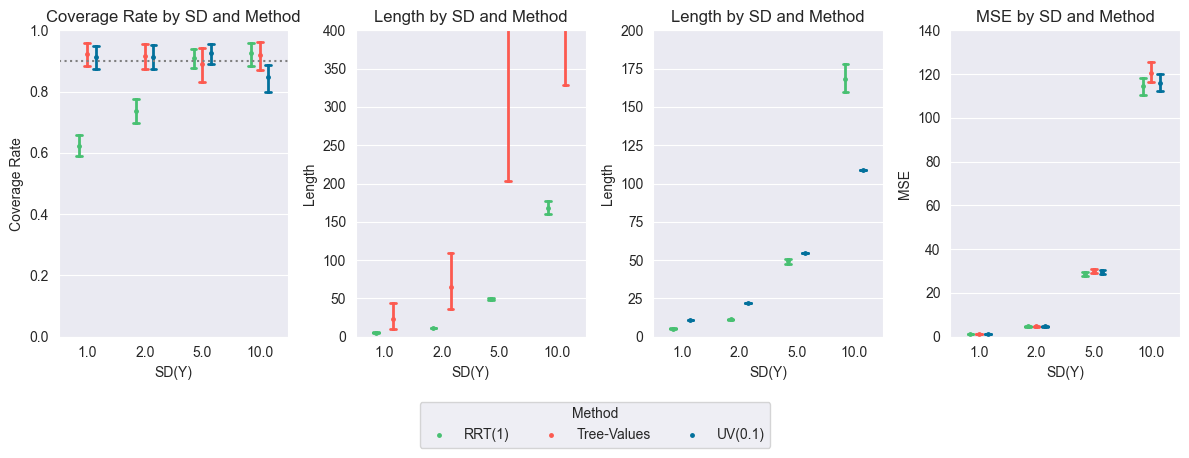

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=False)

oper_char_df['Method'] = oper_char_df['Method'].replace('RRT', 'RRT(1)')

my_palette = {"RRT(1)": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.1)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    oper_char_df_i = oper_char_df.copy()
    if i == 1:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "UV(0.1)"]
    elif i == 2:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "Tree-Values"]
    sns.pointplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df_i, ax=axes[i],
                  dodge=0.3, linestyle='none', markersize=1.5,
                  err_kws={'linewidth': 2}, capsize=0.1, palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('SD(Y)')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif i == 1:
        axes[i].set_ylim(0,400)
    elif i == 2:
        axes[i].set_ylim(0,200)
    elif metric == "MSE":
        axes[i].set_ylim(0,140)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=3)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [16]:
means = oper_char_df.groupby(["SD(Y)", 'Method'])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,SD(Y),Method,Coverage Rate,Length,MSE
0,1.0,RRT(1),0.621978,5.274621,1.347817
1,1.0,Tree-Values,0.922619,23.660798,1.133990
2,1.0,UV(0.1),0.913797,10.910725,1.321848
3,2.0,RRT(1),0.736996,11.491712,4.694735
4,2.0,Tree-Values,0.916972,65.528527,4.766596
5,2.0,UV(0.1),0.913797,21.821449,4.776584
6,5.0,RRT(1),0.910623,49.311050,28.746566
7,5.0,Tree-Values,0.889499,inf,30.048595
8,5.0,UV(0.1),0.925641,54.553623,29.585807
9,10.0,RRT(1),0.924969,168.342872,114.426630


In [17]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [18]:
oper_char_df[tree_flag].groupby(['SD(Y)'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,SD(Y),proportion_infinity
0,1.0,0.000000
1,2.0,0.000000
2,5.0,0.025641
3,10.0,0.000000
